# Inspect Predictions on the Test Set

This notebook is for comfortably inspecting predictions made by the Fully Convolutional Net. As per default, the net should store its predictions in the directory `data/predictions`, following the following naming convention: `predictions_<dist1>_<dist2>_<sample_size>.h5`. If these conventions are complied with, one only has to change the `file_name` variable to view the latest predictions by the net :)

## Preliminaries: iPython magic and imports

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# %config InlineBackend.figure_format = 'pdf'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import h5py

from plottools import plot_spectrogram_label, create_weights

# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('png')

## Read in the predictions and make plots

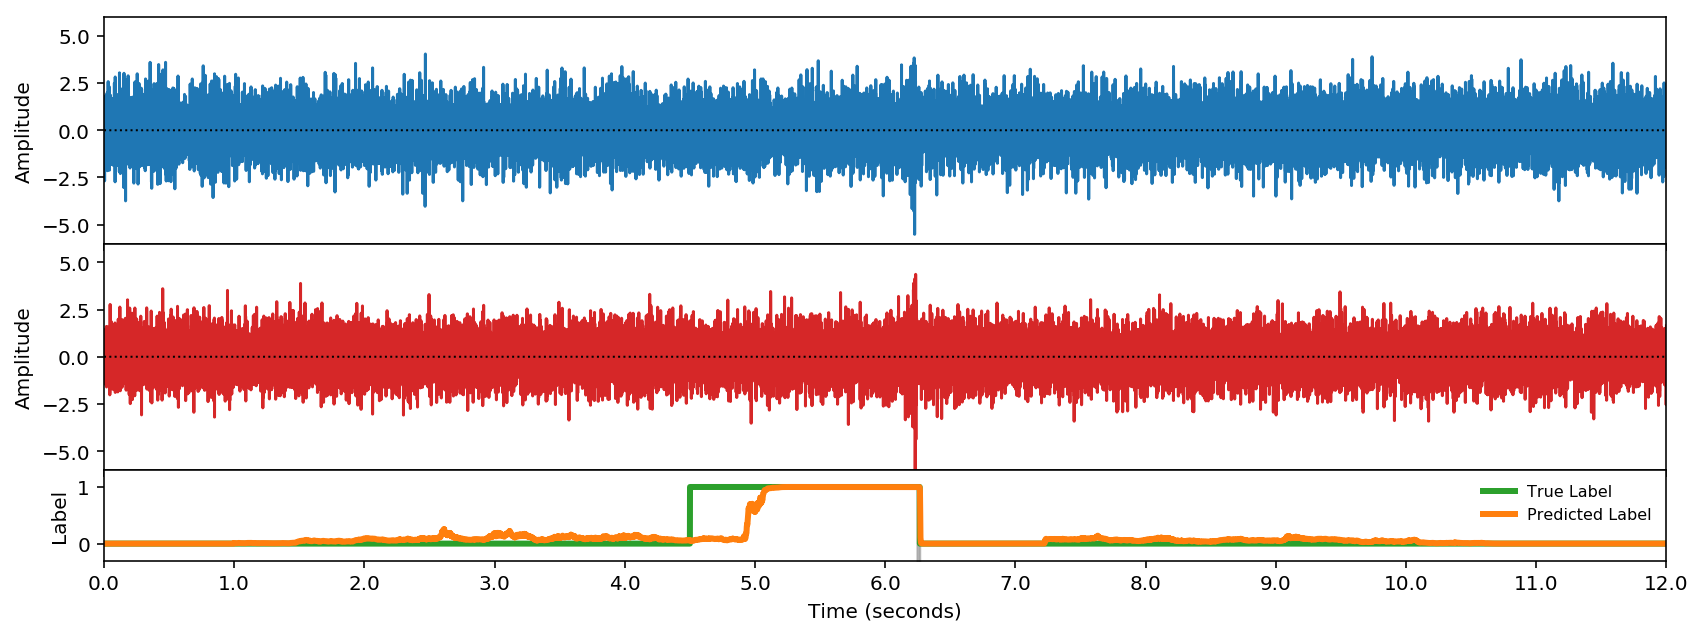

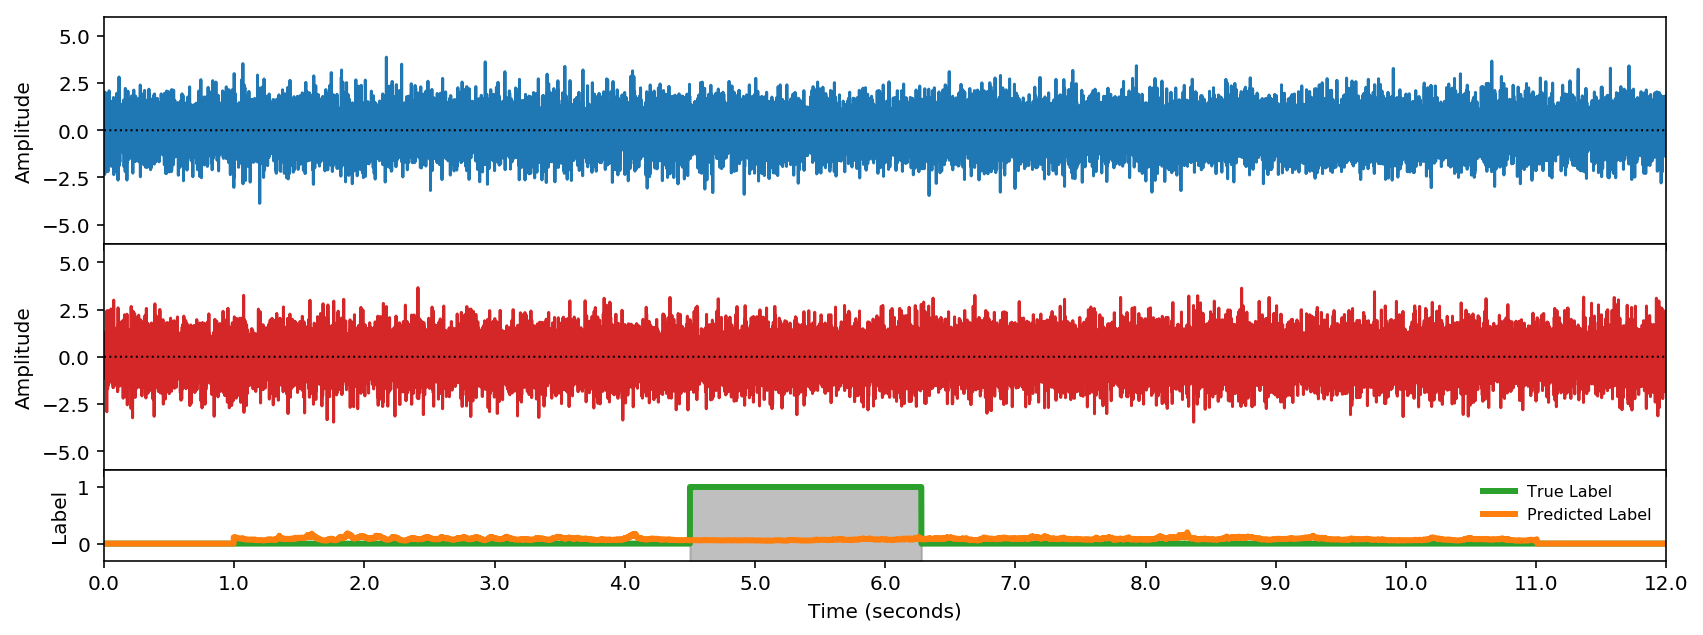

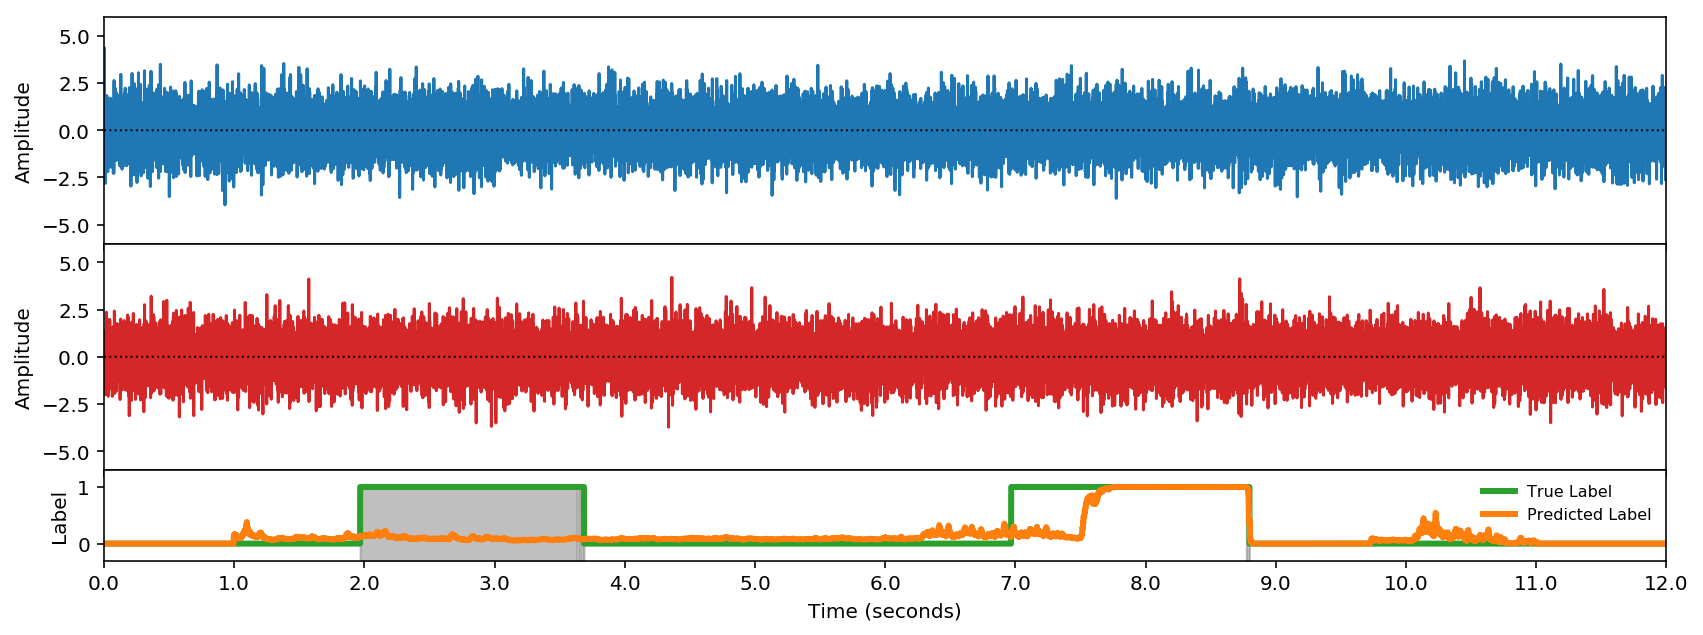

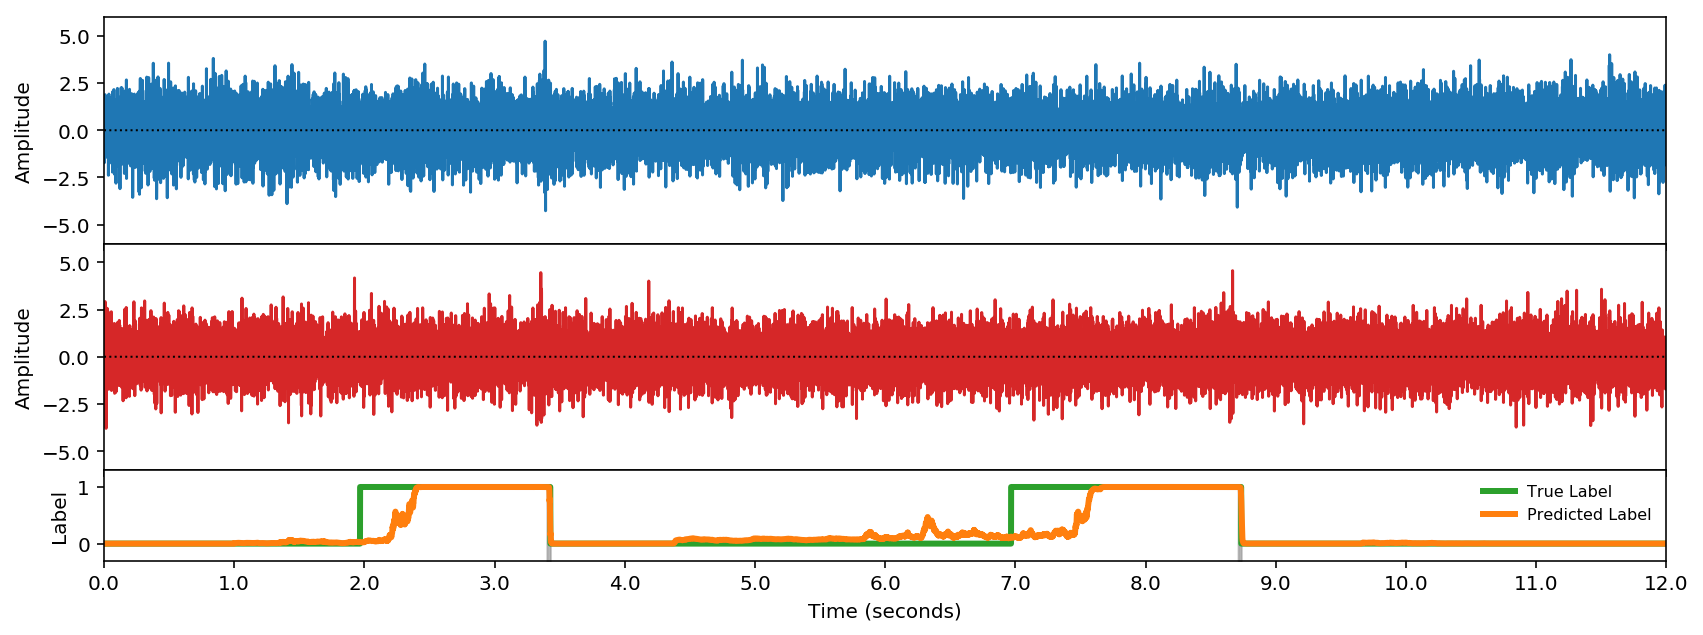

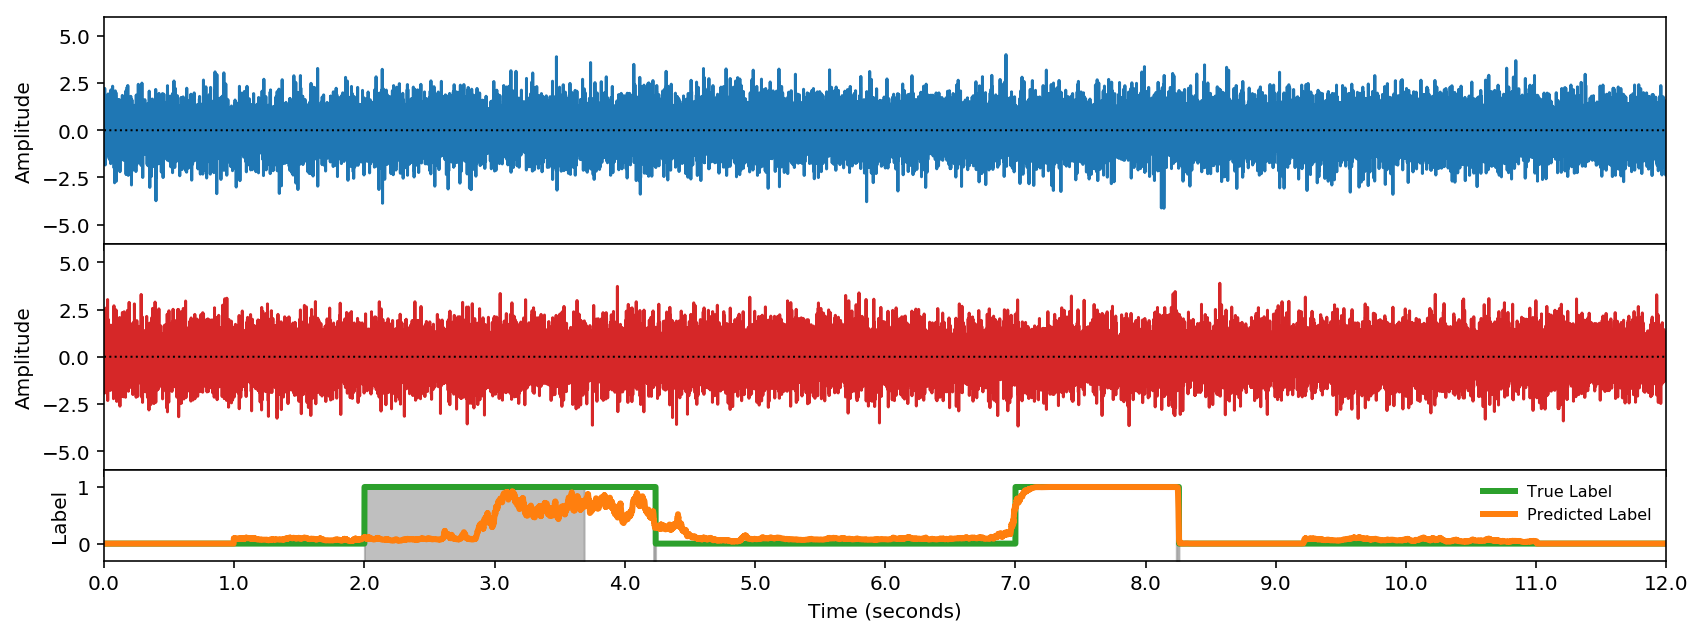

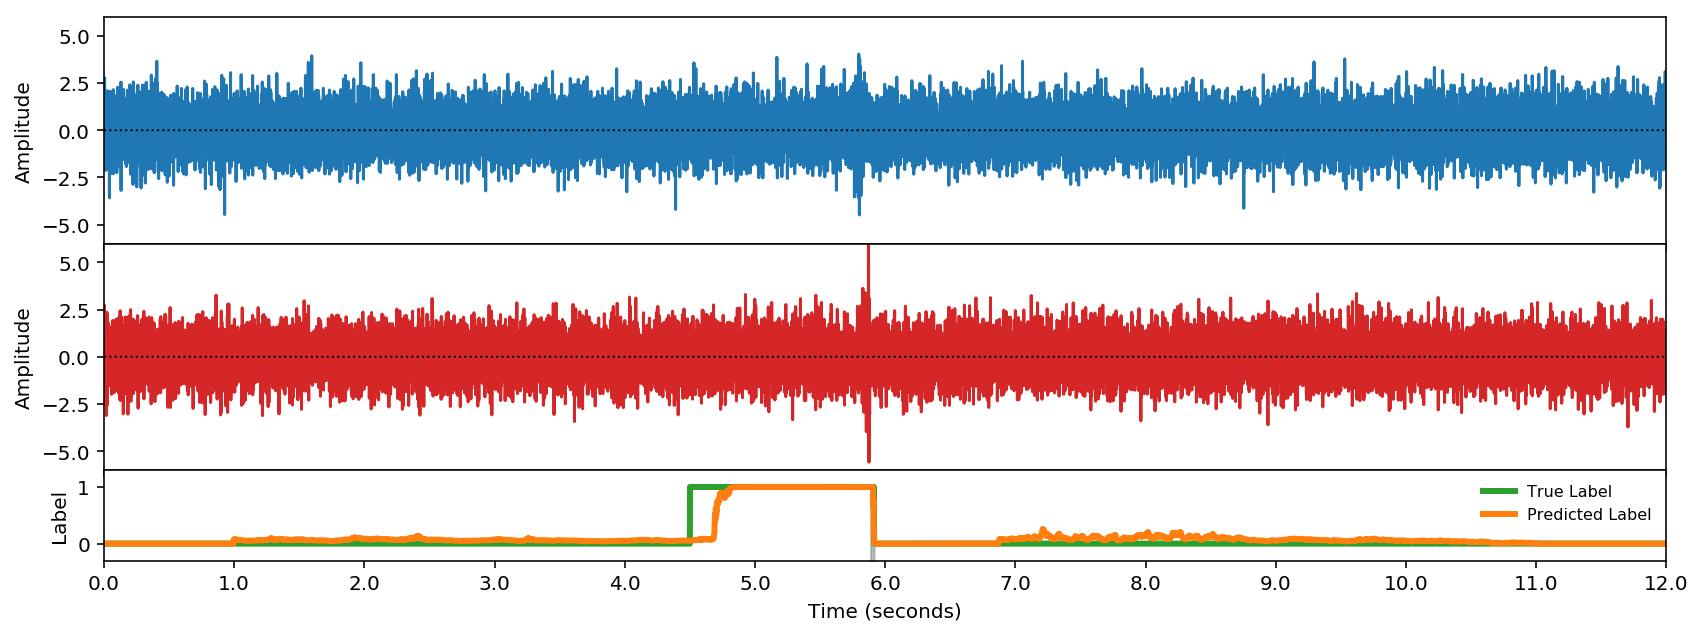

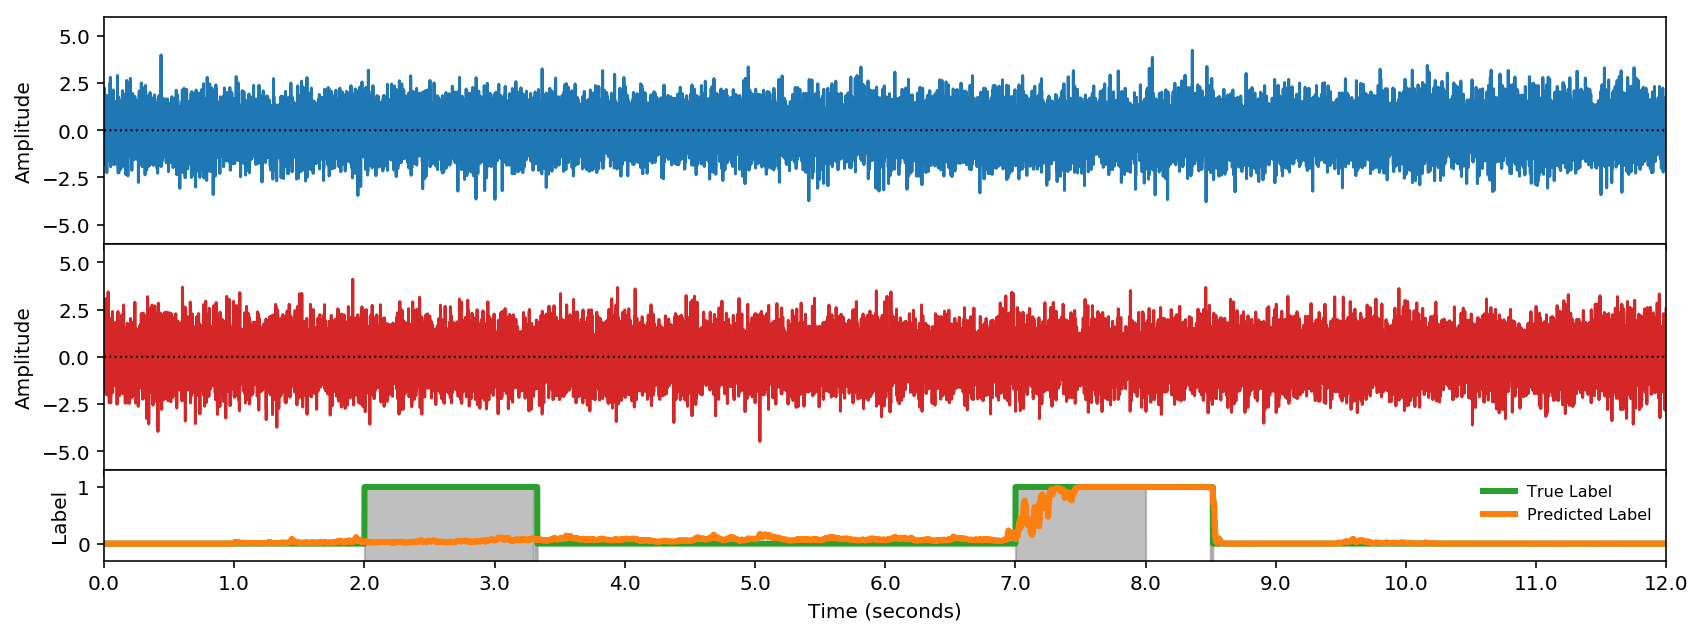

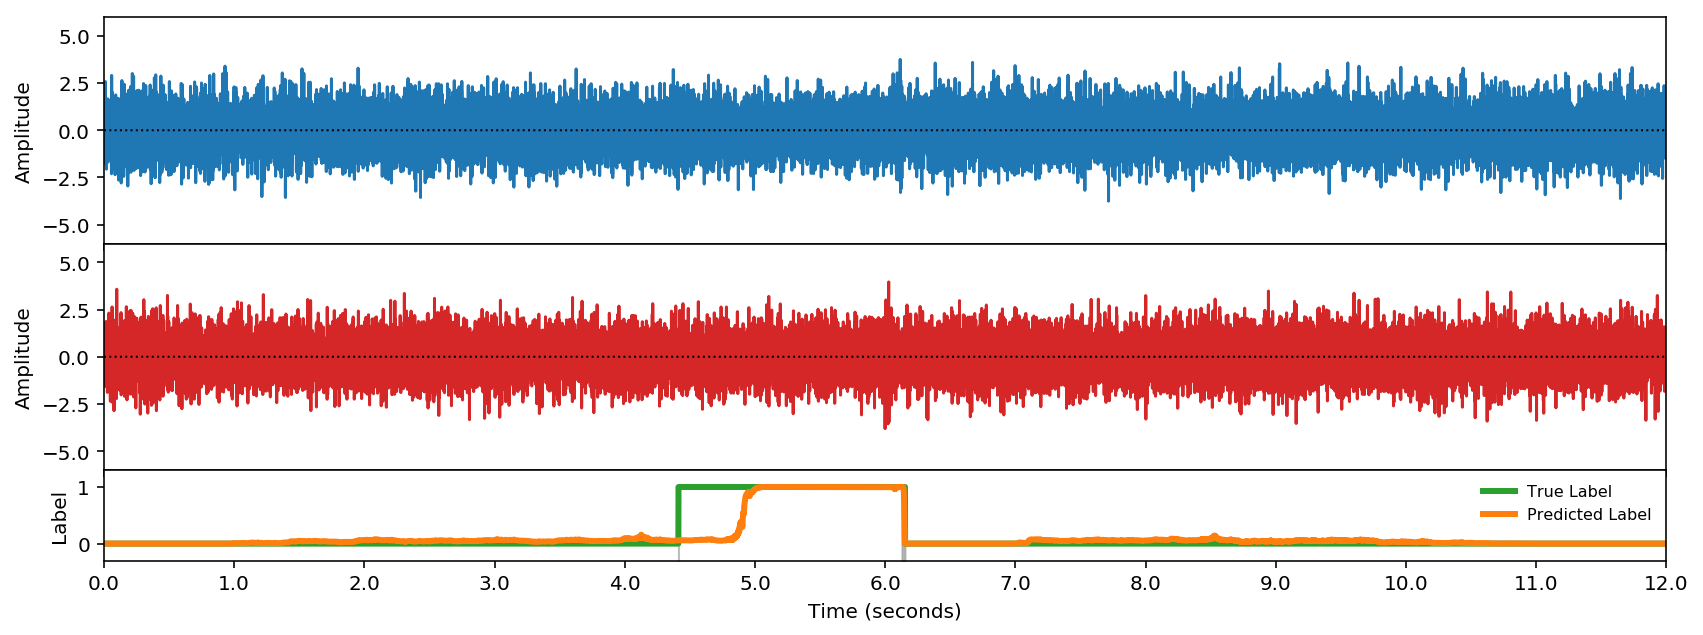

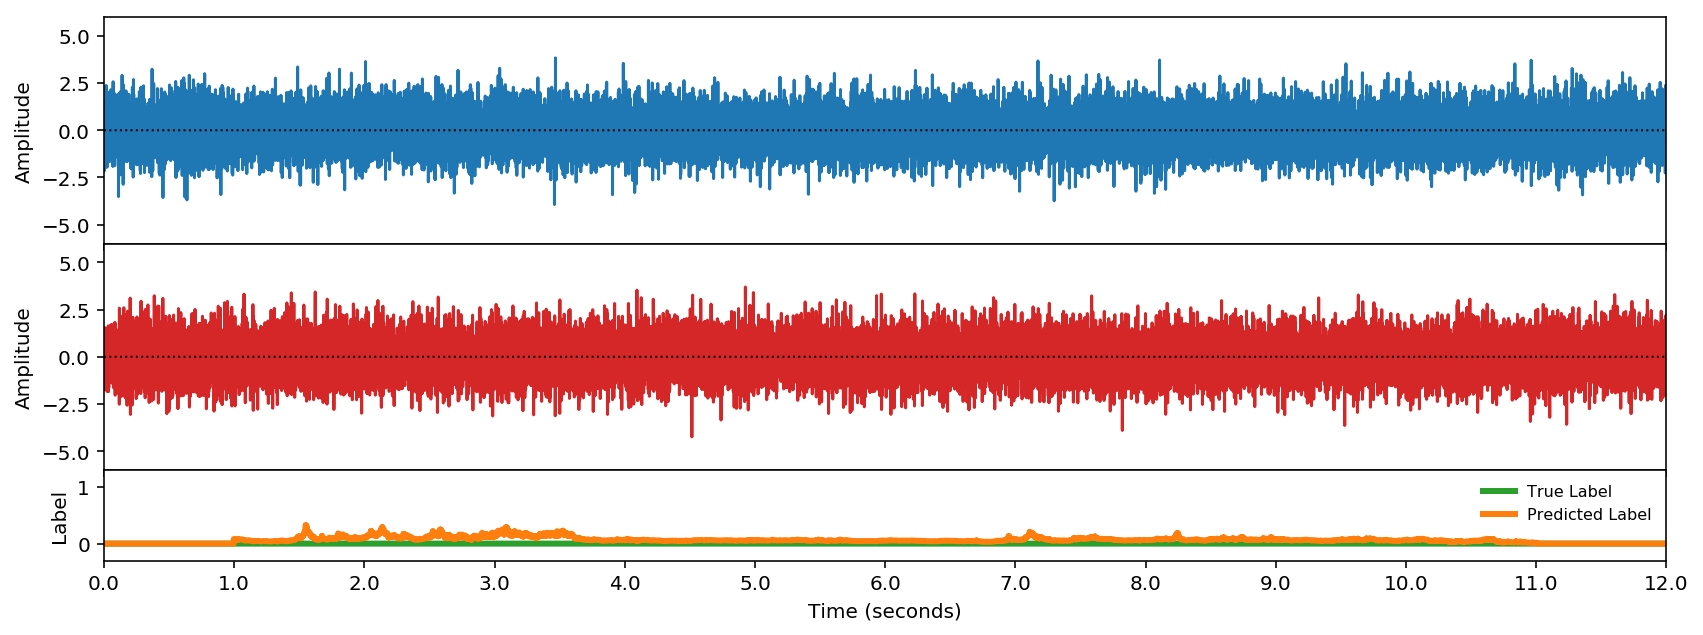

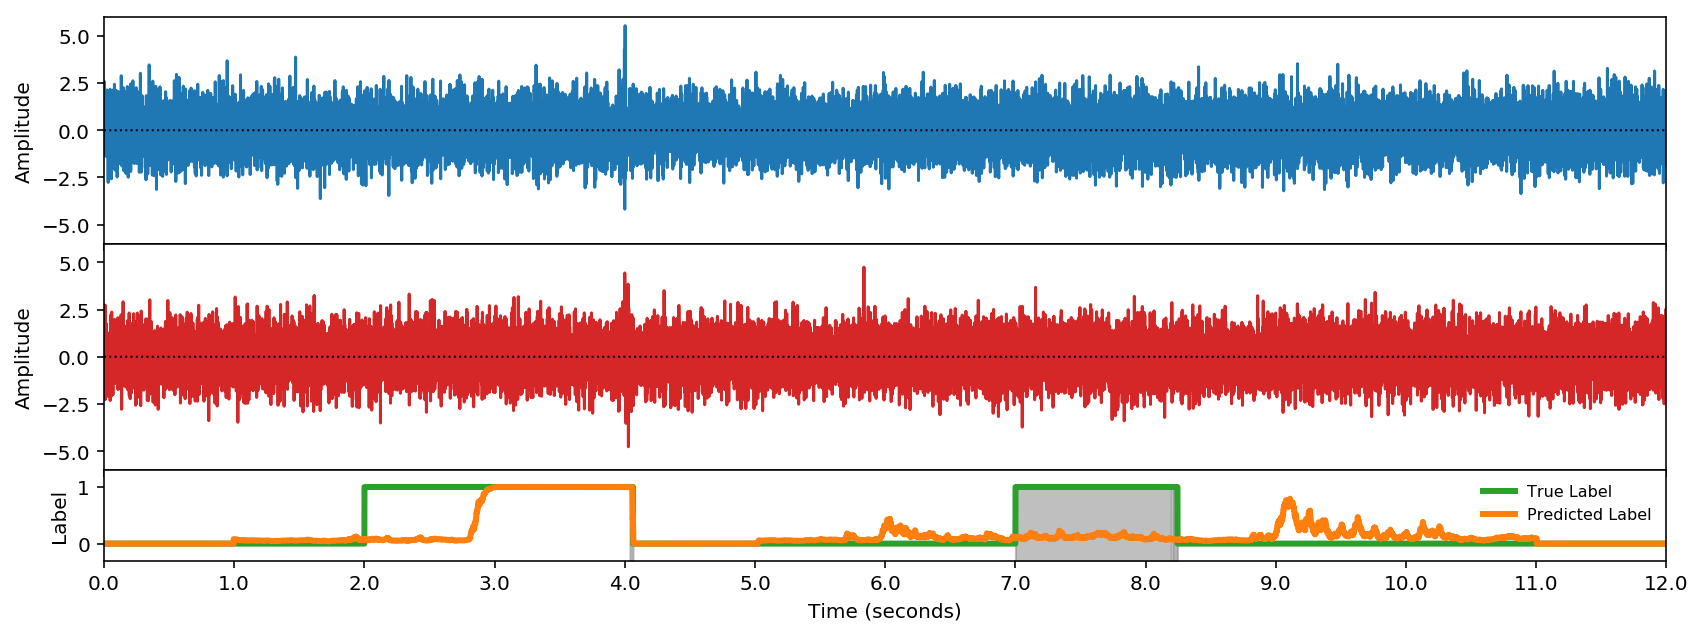

In [5]:
# Path to the directory where all data is stored
data_path = '../data'

# Name of the file containing the predictions we want to inspect
file_name = 'predictions_0700_1200_8k.h5'
file_path = os.path.join(data_path, 'predictions', file_name)

# Open the HDF file and read in the spectrogram, predictions and true labels
with h5py.File(file_path, 'r') as file:
    timeseries = np.array(file['x'])
    pred_labels = np.array(file['y_pred'])
    true_labels = np.array(file['y_true'])


# Plot the first N spectrograms and the respective labels / predictions
for i in range(35, 45):
    
    timeseries_H1 = timeseries[i, 0, :]
    timeseries_L1 = timeseries[i, 1, :]
    
    grid = np.linspace(0, 12, 12*2048)
    fig, axes = plt.subplots(nrows=3, ncols=1, sharex='col',
                             gridspec_kw={'height_ratios': [5, 5, 2]}, 
                             figsize=(14, 5))
    
    axes[0].plot(grid, timeseries_H1, color='C0')
    axes[0].plot(grid, [0 for _ in grid], color='Black', lw=1, ls=':')
    axes[0].set_ylim(-6, 6)
    axes[0].set_ylabel('Amplitude')
    
    axes[1].plot(grid, timeseries_L1, color='C3')
    axes[1].set_ylim(-6, 6)
    axes[1].plot(grid, [0 for _ in grid], color='Black', lw=1, ls=':')
    axes[1].set_ylabel('Amplitude')
    
    # Calculate and plot the fuzzy-zones
    THRESHOLD = 0.0091125644 * 10e-21
    fuzzy_zones = -1 * np.ones(len(pred_labels[i]))
    for j in range(len(pred_labels[i])):
        if 0 < true_labels[i][j] <= THRESHOLD:
            fuzzy_zones[j] = 1
    axes[2].fill_between(grid, -1, fuzzy_zones, color='Gray', alpha=0.5)
    
    axes[2].plot(grid, np.ceil(true_labels[i]), color='C2', lw=3, label='True Label')
    axes[2].plot(grid, pred_labels[i], color='C1', lw=3, label='Predicted Label')
    axes[2].legend(loc='best', frameon=False, fontsize=8)
    axes[1].set_xticks([i for i in range(13)])
    axes[1].set_xticklabels(['{:.1f}'.format(_) for _ in np.linspace(0, 12, 13)])

    
    """
    smooth_pred = np.convolve(pred_labels[i], np.ones(50), mode='same')/50
    
    axes[2].plot(grid, smooth_pred, color='Orange')
    axes[2].plot(grid, np.round(smooth_pred), color='Yellow')
    """
    
    axes[2].set_ylim(-0.3, 1.3)
    axes[2].set_xlabel('Time (seconds)')
    axes[2].set_ylabel('Label')
    fig.subplots_adjust(hspace=0)
    plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)
    plt.xlim(0, 12)
    # plt.suptitle('Time Series (H1/L1), True Label and Predicted Label', y=0.95)
    plt.show()